# 데이터 정리하기 - 데이터 전처리

## 1. 결측치

### 1.1.1 결측값(NaN, None) 처리

1. NaN
    - 자료형이 Float
    - 배열에서 연산할 경우 오류가 발생하지 않지만  결과값이 NaN이 됨
2. None
    - 자료형이 None
    - 배열 연산을 할 경우 오류가 발생

### 1.1.2 결측값(NaN, None) 처리 방법

1. 해당 레코드 삭제
2. 자동으로 채우기
    1. 수치형의 경우
        1. 평균
        2. 중앙값
        3. 0으로 채우기
        4. 앞 방향 또는 뒷 방향으로 채우기
    2. 범주형
        1. 최빈값
3. 전문가의 의견에 따라 직접 채우기
- 앞 시간에 배웠던 결측값 처리 방법

결측값(NaN, None) 처리 방법
- isnull() : 결측값 확인 (결측 이면  True , 결측이 아니면  False )
- notnull() : 결측값 확인 (결측 이면  False , 결측이 아니면  True )
- dropna() : 결측값을 삭제
    - axis=0 : 행 삭제 / axis=1 : 열 삭제
    - inplace = True : drop후 원본에 반영
- fillna(Num) : 결측을 Num 으로 채워 넣음
    - fillna(method='ffill'), fillna(method='bfill') : 앞 방향, 뒷 방향

### 1.1.3 결측값 채우기-타이타닉 데이터

- 타이타닉 데이터는 뒤에서 좀 더 상세히 다룰 예정입니다. 아래 자료를 참고하시면 좀 더 상세한 내용을 보실 수 있습니다.
    
    [캐글 데이터로 살펴보는 데이터분석 With Python and SAS](https://www.notion.so/With-Python-and-SAS-f2b8927d9b054fa5bd12b24e2da7ffb7?pvs=21)
    
- 데이터
    
    [train.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/0cad0be7-b045-409b-b73b-b2a0076c1a9b/train.csv)

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# df.head()
# df.tail()
# df.info()
df.isna().sum() #결측지수 출력

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
df['Age'].isnull().sum() #age 의 결측값 몇개인지 출력

177

In [8]:
#df['Age'].fillna(df['Age'].mean()) #age의 결측값을 age의 평균값으로 채우기 # 원본 아님

df['Age'] = df['Age'].fillna(df['Age'].mean()) #원본 데이터 변경

In [10]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#참고 / 성별 나이 평균 채우기

sex_mean = train.groupby('Sex')['Age'].mean()

train.loc[(train["Sex"] == 'female') & (train["Age"].isnull()), "Age"] = int(sex_mean[0])
train.loc[(train["Sex"] == 'male') & (train["Age"].isnull()), "Age"] = int(sex_mean[1])

# round 반올림
train['Age'] = train['Age'].apply(lambda x:round(x))

train.head(40)

In [ ]:
# (참고) 결측 값 제거하면서 아래와 같이 데이터 정제도 함께 하면 좋습니다.

# 맨 앞의 알파벳 추출하기
train['Cabin'] = train['Cabin'].fillna('N') #결측치를 'N'으로 채우라는 명령
train['Cabin'] = train['Cabin'].apply(lambda x:x[0]) #해당 값을 0번째 값으로만 채우라는 명령

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [13]:
df.Embarked.value_counts() #각 값의 개수 출력

,count
Embarked,
S,644
C,168
Q,77


In [15]:
df.Embarked.isna().sum() #결측값 개수 출력
df.Embarked.isnull().sum() #결측값 개수 출력
df['Embarked'].isnull().sum() #결측값 개수 출력

2

In [16]:
df['Embarked'] = df['Embarked'].fillna('S')

In [17]:
df['Embarked'].isnull().sum() #결측값 개수 출력

0

In [19]:
df.isna().sum() #df 전체에서 결측치 몇개인지 출력

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [23]:
df.Cabin.value_counts()

,count
Cabin,
N,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


In [22]:
df['Cabin'] = df['Cabin'].fillna('N') #결측치를 'N'으로 채우라는 명령
df['Cabin'] = df['Cabin'].apply(lambda x:x[0]) #해당 값을 0번째 값으로만 채우라는 명령

### 1.1.4 결측값 채우기-기상 데이터

기상 데이터에서 기계의 결함, 측정 오류로 인한 데이터 손실이 일어날 수 있습니다.

아래의 데이터는 2010년 일별 기상 데이터를 가져왔습니다.

[기상데이터.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/206ba31b-3208-467f-aafc-bf35b7d46fca/%E1%84%80%E1%85%B5%E1%84%89%E1%85%A1%E1%86%BC%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5.csv)

In [33]:
df = pd.read_csv('weather.csv', encoding='cp949')

df

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
3,2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...,...
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
361,2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8,278.3


In [39]:
#df.head()
#df.tail()
#df.info()
df.isna().sum()

,0
일시,0
최저기온(°C),6
최고기온(°C),6
일강수량(mm),6
최대 순간 풍속(m/s),6
평균 풍속(m/s),8
최대 순간 풍속 풍향(hhmi),6


In [47]:
# 12월 데이터만 출력

df[df['일시'].str[:7] == '2010.12']

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
334,2010.12.1,6.2,16.4,0.0,6.3,3.1,25.2
335,2010.12.2,6.2,12.2,7.5,9.4,3.9,14.1
336,2010.12.3,2.0,11.4,0.0,18.4,5.2,50.5
337,2010.12.4,-0.5,11.3,0.0,8.3,2.9,39.4
338,2010.12.5,2.8,13.8,0.0,8.4,3.1,165.8
339,2010.12.6,1.6,13.1,0.0,24.6,8.6,14.1
340,2010.12.7,0.4,2.0,0.0,20.6,NaN,340.2
341,2010.12.8,NaN,NaN,0.0,NaN,NaN,NaN
342,2010.12.9,NaN,NaN,0.0,NaN,NaN,NaN
343,2010.12.10,NaN,NaN,0.0,NaN,NaN,NaN


In [46]:
# 일 강수량의 결측값을 0으로 채우기

df['일강수량(mm)'] = df['일강수량(mm)'].fillna(0)

In [49]:
df.loc[df['일시'] == '2010.12.8', '최저기온(°C)'] = -1

In [50]:
df[df['일시'].str[:7] == '2010.12']

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
334,2010.12.1,6.2,16.4,0.0,6.3,3.1,25.2
335,2010.12.2,6.2,12.2,7.5,9.4,3.9,14.1
336,2010.12.3,2.0,11.4,0.0,18.4,5.2,50.5
337,2010.12.4,-0.5,11.3,0.0,8.3,2.9,39.4
338,2010.12.5,2.8,13.8,0.0,8.4,3.1,165.8
339,2010.12.6,1.6,13.1,0.0,24.6,8.6,14.1
340,2010.12.7,0.4,2.0,0.0,20.6,NaN,340.2
341,2010.12.8,-1.0,NaN,0.0,NaN,NaN,NaN
342,2010.12.9,NaN,NaN,0.0,NaN,NaN,NaN
343,2010.12.10,NaN,NaN,0.0,NaN,NaN,NaN


In [51]:
df[df['일시'].str[:7] == '2010.12']['최대 순간 풍속(m/s)'].describe()

,최대 순간 풍속(m/s)
count,25.000000
mean,15.812000
std,6.189327
min,6.300000
25%,9.900000
50%,15.500000
75%,20.300000
max,26.700000


In [53]:
df['최대 순간 풍속(m/s)'] = df['최대 순간 풍속(m/s)'].fillna(24.1)

In [56]:
df[df['일시'].str[:7] == '2010.12']

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
334,2010.12.1,6.2,16.4,0.0,6.3,3.1,25.2
335,2010.12.2,6.2,12.2,7.5,9.4,3.9,14.1
336,2010.12.3,2.0,11.4,0.0,18.4,5.2,50.5
337,2010.12.4,-0.5,11.3,0.0,8.3,2.9,39.4
338,2010.12.5,2.8,13.8,0.0,8.4,3.1,165.8
339,2010.12.6,1.6,13.1,0.0,24.6,8.6,14.1
340,2010.12.7,0.4,2.0,0.0,20.6,NaN,340.2
341,2010.12.8,-1.0,NaN,0.0,24.1,NaN,NaN
342,2010.12.9,NaN,NaN,0.0,24.1,NaN,NaN
343,2010.12.10,NaN,NaN,0.0,24.1,NaN,NaN


In [55]:
df[df['일시'].str[:7] == '2010.12']['평균 풍속(m/s)'].describe()

,평균 풍속(m/s)
count,23.000000
mean,4.791304
std,1.825554
min,2.900000
25%,3.450000
50%,4.200000
75%,5.500000
max,9.600000


In [ ]:
df['평균 풍속(m/s)'] = df['평균 풍속(m/s)'].fillna(4.791304)

In [57]:
df.columns

Index(['일시', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '최대 순간 풍속(m/s)', '평균 풍속(m/s)',
       '최대 순간 풍속 풍향(hhmi)'],
      dtype='object')

In [59]:
df[df['일시'].str[:7] == '2010.12']['최저기온(°C)'].describe()

,최저기온(°C)
count,26.000000
mean,0.284615
std,3.178766
min,-4.400000
25%,-1.950000
50%,-0.100000
75%,1.925000
max,6.400000


In [60]:
df['최저기온(°C)'] = df['최저기온(°C)'].fillna(-0.1)

In [61]:
df[df['일시'].str[:7] == '2010.12']['최고기온(°C)'].describe()

,최고기온(°C)
count,25.000000
mean,7.908000
std,5.339547
min,-1.000000
25%,2.200000
50%,8.800000
75%,12.800000
max,16.400000


In [63]:
df['최고기온(°C)'] = df['최고기온(°C)'].fillna(2.2)

In [65]:
df.isna().sum()

,0
일시,0
최저기온(°C),0
최고기온(°C),0
일강수량(mm),0
최대 순간 풍속(m/s),0
평균 풍속(m/s),8
최대 순간 풍속 풍향(hhmi),6


In [67]:
df['평균 풍속(m/s)'].describe()

,평균 풍속(m/s)
count,357.000000
mean,4.378151
std,1.627493
min,1.400000
25%,3.200000
50%,4.100000
75%,5.400000
max,10.000000


In [69]:
df['평균 풍속(m/s)'] = df['평균 풍속(m/s)'].fillna(4.3)

In [71]:
df.isna().sum()

,0
일시,0
최저기온(°C),0
최고기온(°C),0
일강수량(mm),0
최대 순간 풍속(m/s),0
평균 풍속(m/s),0
최대 순간 풍속 풍향(hhmi),6


In [73]:
# 최대 순간 풍속 풍향(hhmi)	컬럼 삭제
# dropna() : 결측값이 포함된 행, 열 을 삭제

df.dropna(axis=1, inplace=True) #inplace = True -> 원본에 적용
df

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4
3,2010.1.4,1.0,11.5,1.0,22.4,5.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1
...,...,...,...,...,...,...
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8
361,2010.12.28,1.0,8.8,0.0,15.5,5.2
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8


In [74]:
df.isna().sum()

,0
일시,0
최저기온(°C),0
최고기온(°C),0
일강수량(mm),0
최대 순간 풍속(m/s),0
평균 풍속(m/s),0


## 1.2 데이터 일반화

특정 구간에 분포하는 값으로 스케일 변화를 합니다.

In [8]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
df['Age'].isna().sum()

177

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.679272,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [17]:
df['Age'].isna().sum()

0

In [18]:
# 나이를 int 로 바꿔주는 함수
def int_age(x):
  return int(x)

# Age 열을 int_age 함수에 적용시키기
df['Age'] = df['Age'].apply(int_age)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [21]:
# male=1, female=0 으로 변환해주는 함수
def int_sex(x):
  if x == 'male':
    return 1
  else:
    return 0
  return int(x)

# Age 열을 int_age 함수에 적용시키기
df['Sex'] = df['Sex'].apply(int_sex)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,C148,C


## 1.3. 이상치 처리

이상치 유무에 따라 분석 결과가 달라지기 때문에 이전에 이상치를 찾아 다른 값으로 변환하거나 제거합니다.

1. 시각화
- Boxplot, histogram
1. 통계량 사용
- 평균, 중앙값, 최빈값, 잔차, 표준편차 등의 값으로 확인한다.
1. 단순 삭제
    
    단순 오타, 비현실적 응답, 데이터 처리 과정의 오류 등

In [25]:
df = pd.read_excel('wrongdata.xlsx', index_col='번호')

df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,-57,48,67


In [26]:
df['국어'] = df['국어'].replace(-57, 57) # -57을 57로 변경

df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


In [27]:
df.describe()

,국어,수학,영어
count,10.000000,10.000000,10.00000
mean,144.500000,77.300000,62.00000
std,234.719336,29.616249,29.06315
min,32.000000,24.000000,21.00000
25%,59.750000,54.250000,35.25000
50%,75.000000,83.500000,68.00000
75%,89.500000,99.250000,87.00000
max,810.000000,120.000000,100.00000


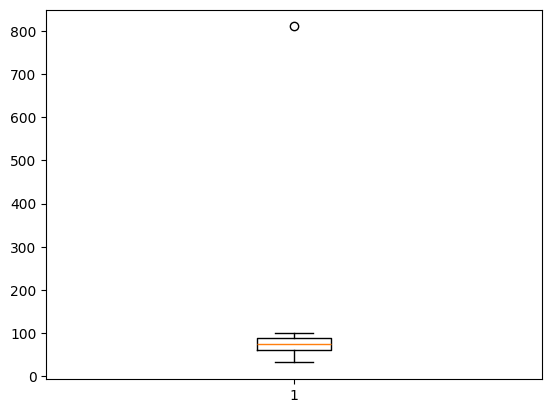

In [30]:
# 시각화해서 이상값 확인하기

import matplotlib.pyplot as plt

plt.boxplot(df['국어'])
plt.show()

In [32]:
q3 = df.quantile(0.25)
q3

,0.25
국어,59.75
수학,54.25
영어,35.25


In [36]:
q1=df.quantile(0.25)
q1

,0.25
국어,59.75
수학,54.25
영어,35.25


In [37]:
IQR=q3-q1
IQR

,0.25
국어,0.0
수학,0.0
영어,0.0


In [38]:
def kor_outlier(df):
    kor_score = df['국어']
    if kor_score > q3['국어'] + 1.5 * IQR['국어'] or kor_score < q1['국어'] - 1.5 * IQR['국어']:
        return True
    else:
        return False

df['국어_이상치여부'] = df.apply(kor_outlier, axis = 1)

df

,국어,수학,영어,국어_이상치여부
번호,,,,
1,32,80,100,True
2,50,100,90,True
3,810,100,78,True
4,80,120,21,True
5,88,67,29,True
6,70,50,69,True
7,68,24,34,True
8,90,97,39,True
9,57,48,67,True
